In [15]:
import experimenting
import event_library as el
import torch
from matplotlib import pyplot as plt
from experimenting.utils.visualization import plot_skeleton_2d, plot_skeleton_3d
from experimenting.utils.skeleton_helpers import Skeleton

In [78]:
hw = el.utils.get_hw_property('dvs')

In [79]:
!ls

Cameras.ipynb				     explore_h3m.ipynb
Eval_2D_triangulation_and_3D_tutorial.ipynb  margipose.ipynb
evaluate_model.ipynb			     vid2events_notebook.ipynb
examples				     visualizations.ipynb


In [80]:
#core = experimenting.dataset.HumanCore('test', '/data/gscarpellini/dataset/human3.6m/constant_count', '/data/gscarpellini/dataset/human3.6m/constant_count/3d_joints.npz', 'cross-subject', 1)
core = experimenting.dataset.HumanCore('test', '../scripts/h3m/out/', '../scripts/h3m/out/3d_joints.npz', 'cross-subject', 1)

No handles with labels found to put in legend.


{'subject': 1, 'action': 'Directions 1', 'cam': 0, 'frame': '0000101'}
../scripts/h3m/out/S1/Directions 1.54138969/frame0000100.npy


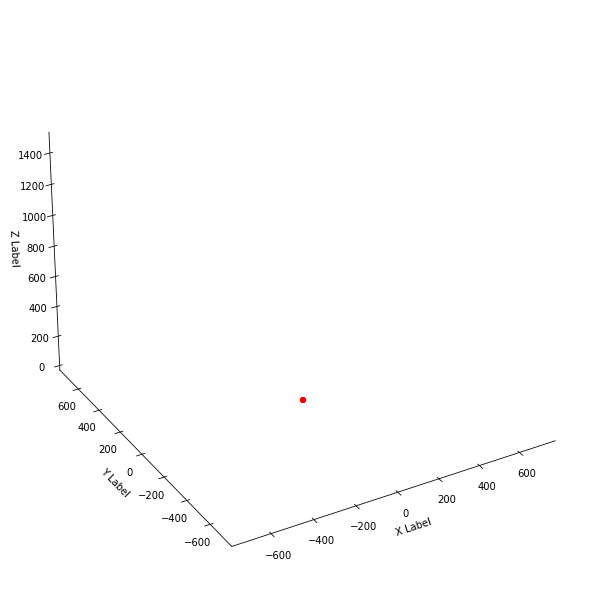

In [ ]:
idx = 100
print(core.frames_info[idx+1])
sk, intr, extr = core.get_joint_from_id(idx)
frame = core.get_frame_from_id(idx)
joints = sk.get_2d_points(260, 346, intrinsic_matrix=intr, extrinsic_matrix=extr)
plot_skeleton_3d(sk)
plot_skeleton_2d(frame.squeeze(), joints)